In [60]:
# Se importan las librerías necesarias para los análisis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

# **Importamos la data con la información conseguida**

In [61]:
# pd.read_csv permite buscar y leer un archivo de tipo csv (ubicación del archivo, delimitador de columnas, forma,to en el que esta escrito la información)
df = pd.read_csv('heartAttack.csv', sep=",", encoding='latin1')

Leemos nuestro dataset importado desde el comando `pd.read_csv` y le indicamos la hoja si en caso tuviera más de una.

# **Exploración de la data**

In [62]:
# Muestra la cantidad de registros que contiene el documento y el número de columnas
df.shape

(1025, 14)

**Resultado**: Se muestra que el dataset que se está analizando tiene 1025 filas y 14 columnas.

In [63]:
# Muestra el contenido del dataset y sus valores. Se puede especificar la cantidad de registros a mostrar.
df.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

**Resultados**: Podemos ver que el comando head nos permite visualizar un poco sobre el dataset como las columnas indicadas y limitándolo a mostrarnos 5 registros.

Podemos ver que el comando `head` nos permite visualizar un poco sobre el dataset, como las columnas indicadas, y limitado a mostrarnos 5 registros.
Las variables obtenidas en la tabla son:

- **age**: Edad  
- **sex**: Sexo  
- **cp**: Dolor de pecho  
- **tresbps**: Presión arterial en reposo  
- **chol**: Colesterol sérico en mg/dl  
- **fbs**: Nivel de azúcar en sangre en ayunas  
- **Restecg**: Resultados del electrocardiograma en reposo  
- **thalach**: Frecuencia cardíaca máxima alcanzada  
- **exang**: Angina inducida por ejercicio  
- **oldpeak**: Depresión del segmento ST  
- **slope**: Pendiente del segmento ST en el ejercicio máximo  
- **ca**: Número de vasos principales (0-3) coloreados por fluoroscopia  
- **thal**: Valores:  
    - 3 -> Normal  
    - 6 -> Defecto  
    - 7 -> Defecto reversible  
- **target**: Valores:  
    - 0 -> Menor probabilidad de ataque cardíaco (Negativo)
    - 1 -> Mayor probabilidad de ataque cardíaco (Positivo)

In [64]:
# Analiza si encuentra valores nulos
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Resultado**: Visualizamos que no existen valores nulos en ningún campo.

In [65]:
# Muestra información básica del dataset como es el número de registros, los nombres de columnas, el estado de los registros y el tipo de dato por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Resultado**: Podemos visualizar el tipo de dato de cada columna y la cantidad de registros que tienen.

In [66]:
# Proporciona información resumida sobre columnas numéricas
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

Información proporcionada:

- **count**: Número de valores no nulos.
- **mean**: Media aritmética.
- **std**: Desviación estándar.
- **min**: Valor mínimo.
- **25%**: Percentil 25 (primer cuartil).
- **50%**: Percentil 50 (mediana).
- **75%**: Percentil 75 (tercer cuartil).
- **max**: Valor máximo.

**Resultado**: Analizando las variables numéricas. Vemos que los valores son normales y no existe una data desbalanceada en la variable target.
Se puede observar que el promedio de la variable age es de 54 años, tiene un mínimo de 29 y un máximo de 77 años. La media de la variable chol es de  246. También el valor promedio de la variable thalach es de 149.

# **Variable objetivo (Target)**

In [67]:
df['target'].value_counts(normalize=False).to_frame('Cantidad').join(
    df['target'].value_counts(normalize=True).mul(100).round(2).to_frame('Proporción (%)')
)

Cantidad  Proporción (%)
target                          
1            526           51.32
0            499           48.68

**Resultado**: La variable target tiene 2 valores: 

- **0** = que indica la menor probabilidad de ataque cardíaco y 
- **1** = la que tiene mayor probabilidad. 

Aquí podemos observar tanto la cantidad, la distribución. Esto quiere decir que existen muchos pacientes con una alta probabilidad de sufrir algún ataque, lo cual nos sirve mucho para el análisis predictivo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23768\3306947185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='target', data=df, kind="count", palette=["#3498db", "#e74c3c"])


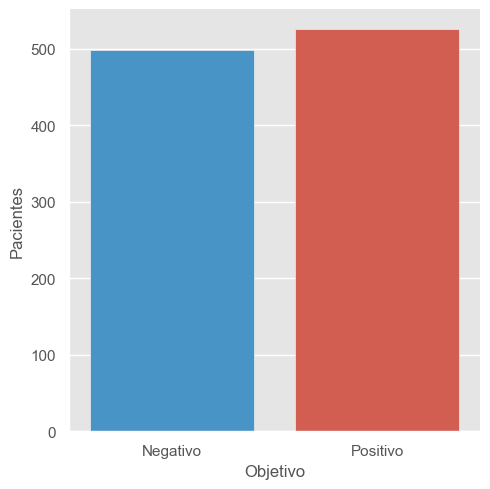

In [68]:
sns.catplot(x='target', data=df, kind="count", palette=["#3498db", "#e74c3c"])

# Cambiar los nombres de los ejes
plt.xlabel("Objetivo")  # Nombre Objetivo para el eje X
plt.ylabel("Pacientes")  # Nombre Pacientes para el eje Y

# Transformación de la representación de Objetivo(Target)
plt.xticks(ticks=[0, 1], labels=["Negativo", "Positivo"])

plt.show()

**Resultado**: De una forma más gráfica podemos visualizar la variable target con una distribución pareja lo cual no ayudará mucho al momento de clasificar.

# **Variables Cuantitativas**

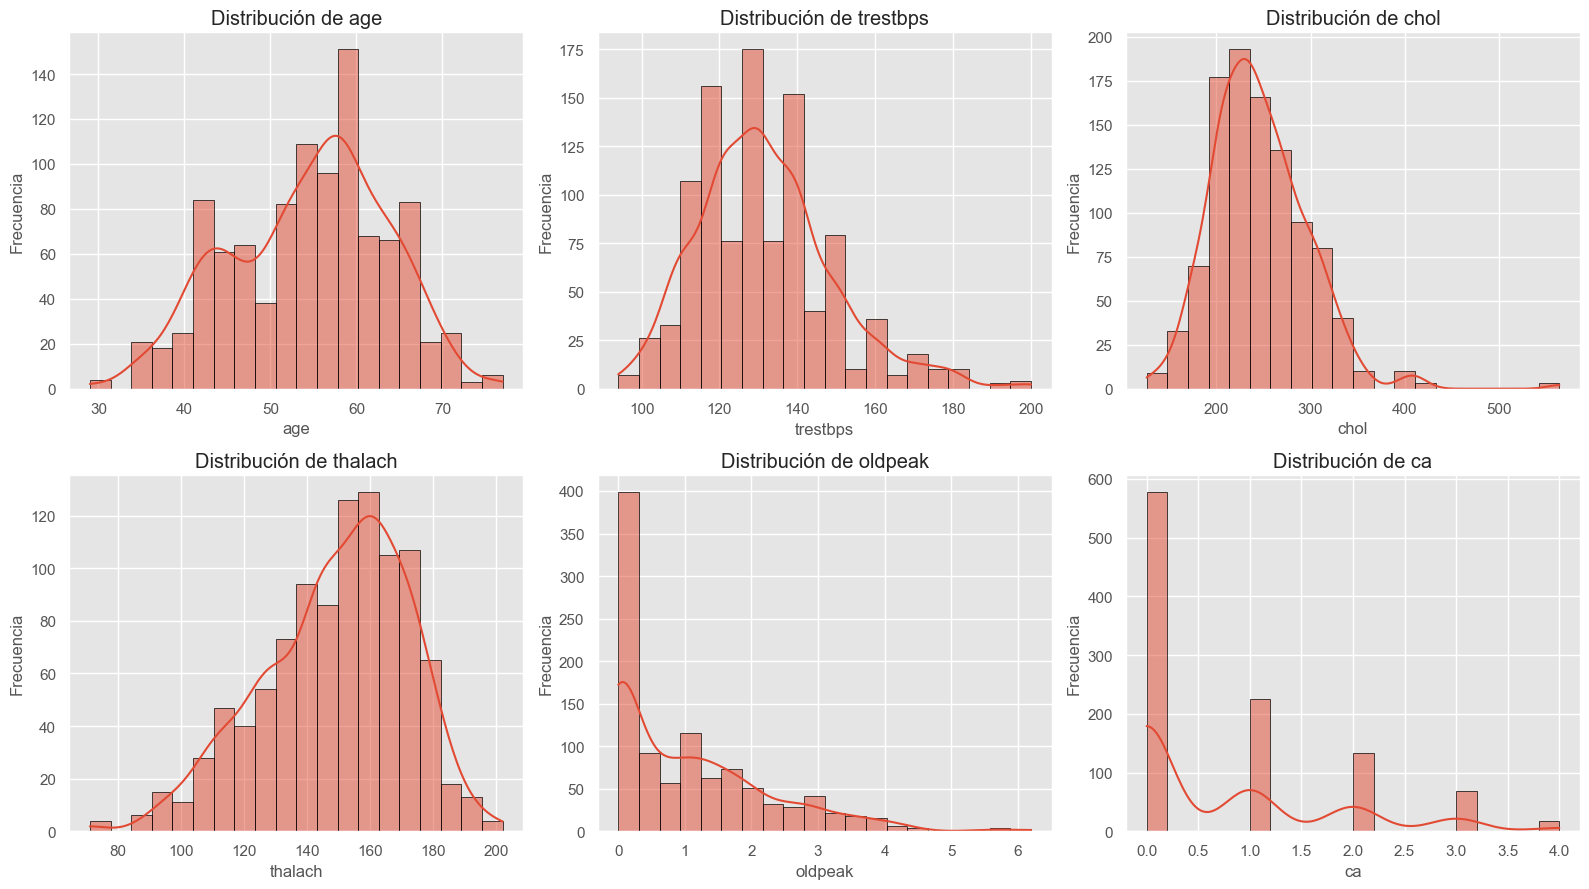

In [10]:
Var=['age','trestbps','chol','thalach','oldpeak','ca']

for i, var in enumerate(Var, 1):
    plt.subplot(2, 3, i)  # Organiza en una cuadrícula de 2 filas x 3 columnas
    sns.histplot(df[var], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Resultado**: Podemos observar que en la variable edad, se concentra entre los 50-60 años de edad.

Las variables chol (Nivel de colesterol sérico) y thalach (Frecuencia cardíaca máxima alcanzada) tienen valores muy altos lo que podría ser un indicador para para nuestro modelo.

Según la gráfica, las variables: trestbps (Presión arterial en reposo), oldpeak (Depresión del segmento ST inducida por el ejercicio), ca (Número de vasos principales coloreados por fluoroscopia) pueden presentar variables atípicas (outliers) ya que tienen valores a los extremos.

## **Correlación entre variables numéricas**

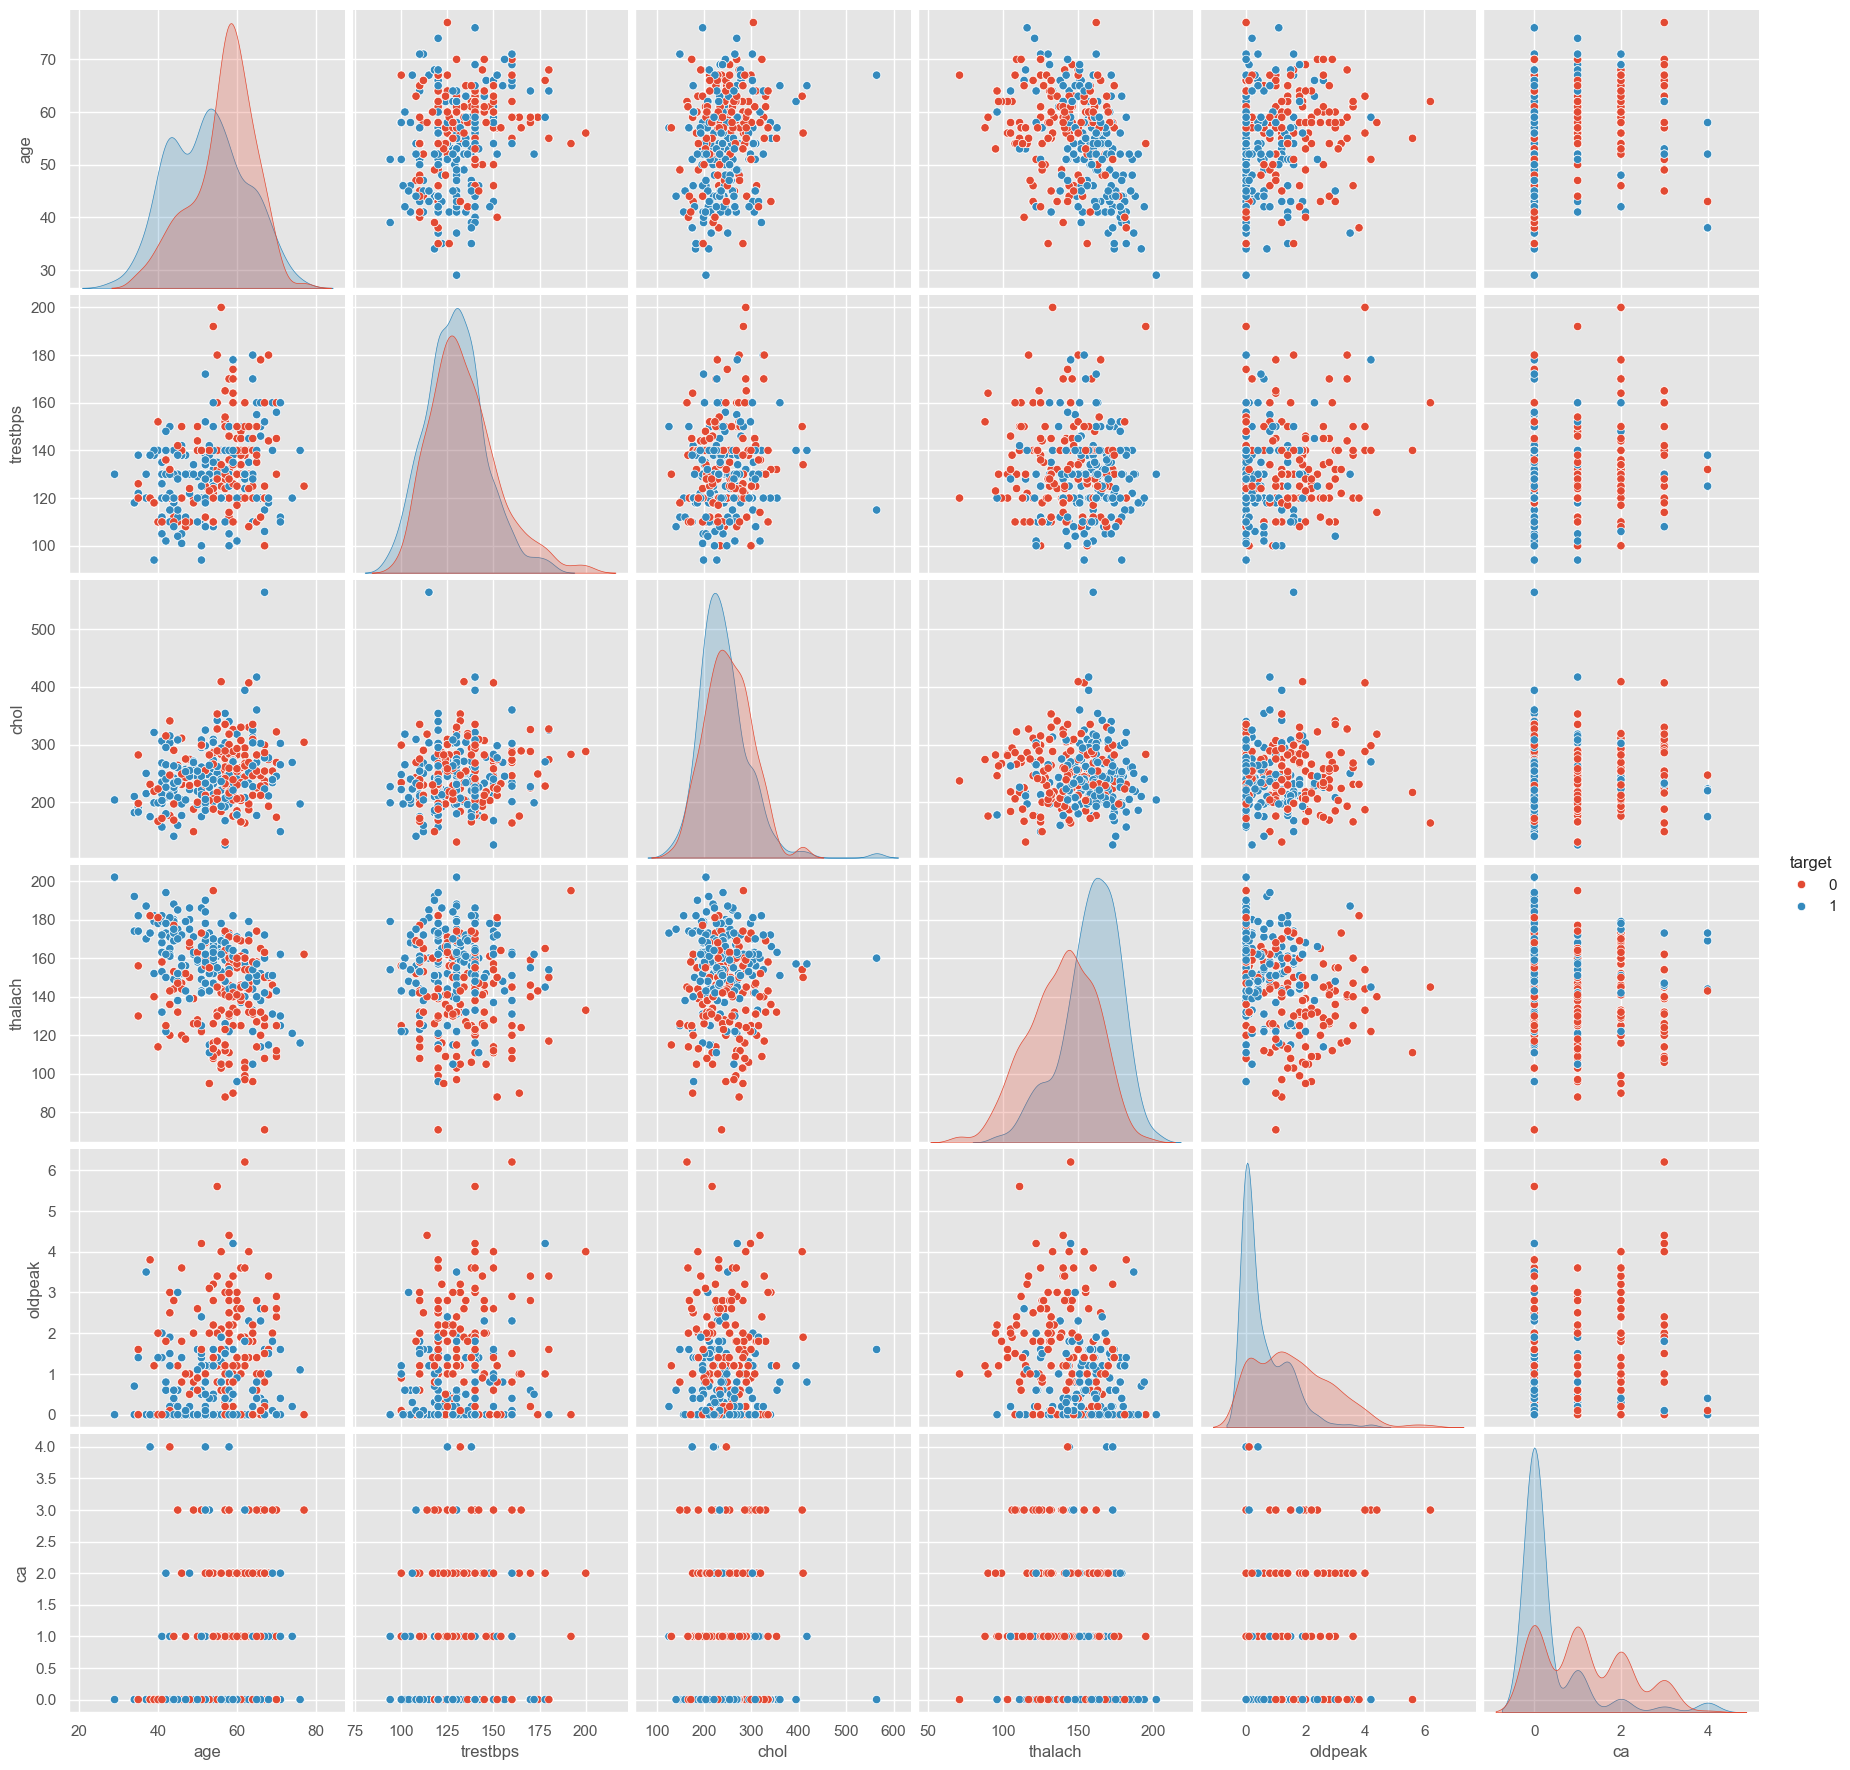

In [11]:
var = ['age','trestbps','chol','thalach','oldpeak','ca', 'target']
sns.pairplot(df[var], hue='target', height=3, diag_kind='kde')

**Resultado**: Hay una cierta tendencia donde los pacientes entre 40 - 60 años tienden a tener un thalach menor. Las demás variables no presentan valores muy dispersos.

# **Correalación entre todas las variables**

Se correlacionan las variables de de manera que identificamos aquellos que tiene mayor relación y los que tienen dispersión (conocidos también como Atípicos u Outlayers)

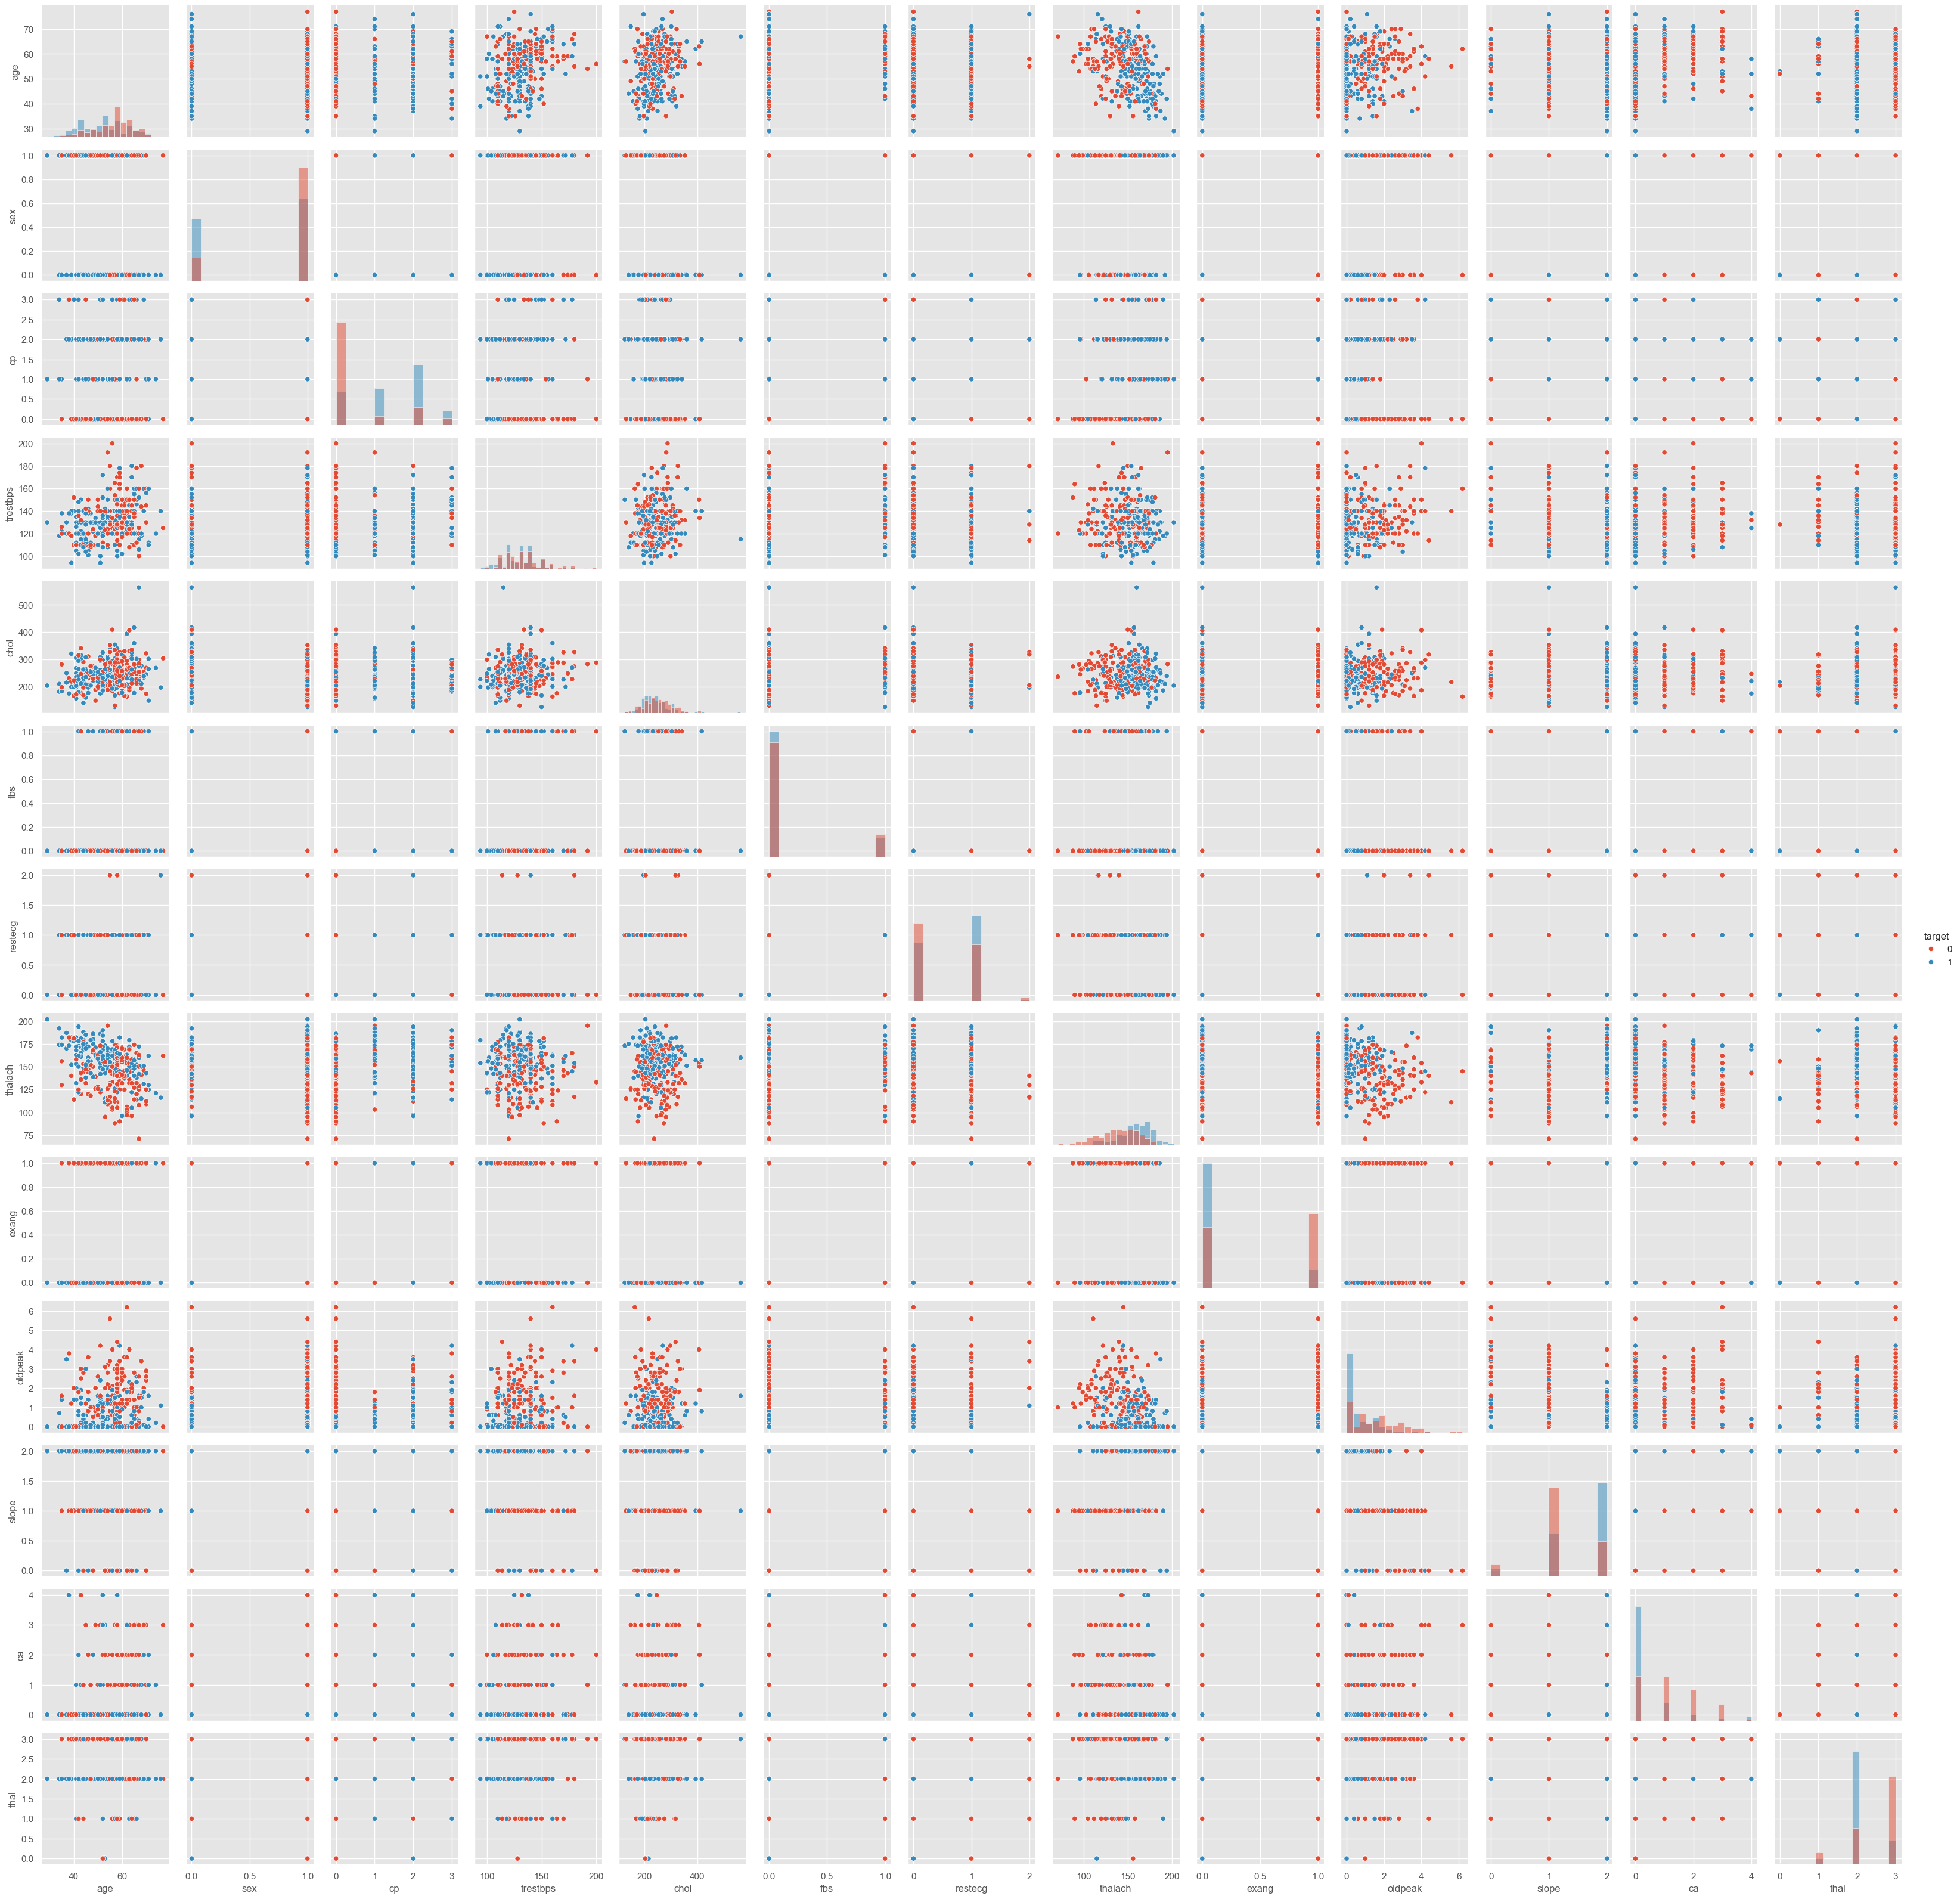

In [69]:
grap = sns.PairGrid(df, hue="target")
grap.map_diag(sns.histplot)
grap.map_offdiag(sns.scatterplot)
grap.add_legend()

- Reafirmamos que en este caso se utilizaron todas las variable y todos los datos.

In [70]:
# Cantidad de datos procesados
print('• Tamaño actual de salida de variables: ', df.shape)


• Tamaño actual de salida de variables:  (1025, 14)


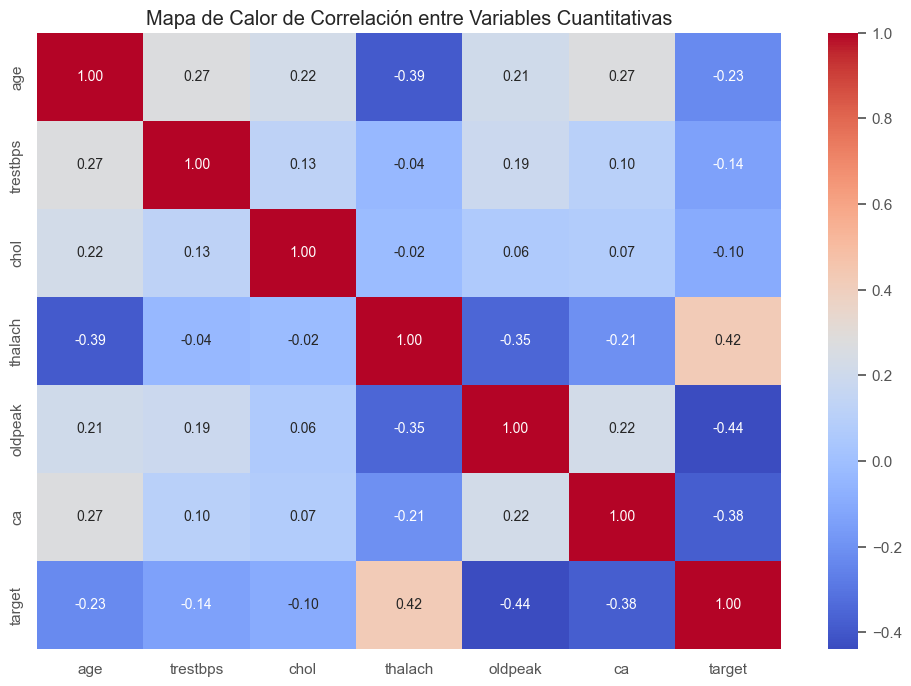

In [71]:
corr = df[['age','trestbps','chol','thalach','oldpeak','ca','target']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables Cuantitativas")
plt.show()

**Resultado**: Teniendo en cuenta las variables numéricas Se visualiza que la variable `thalach` (frecuencia cardíaca máxima) tiene una relación negativa con la variable `age` (edad), quiere decir que a mayor edad se reduce la (frecuencia cardíaca). Existe también una relación negativa pero baja entre las variables `odpeak` (depresión ST) y `thalach` y podría considerarse como un factor para los ataques cardíacos. Las otras variables tienen valores bajos de correlación lo que quiere decir que no tiene una relación fuerte.

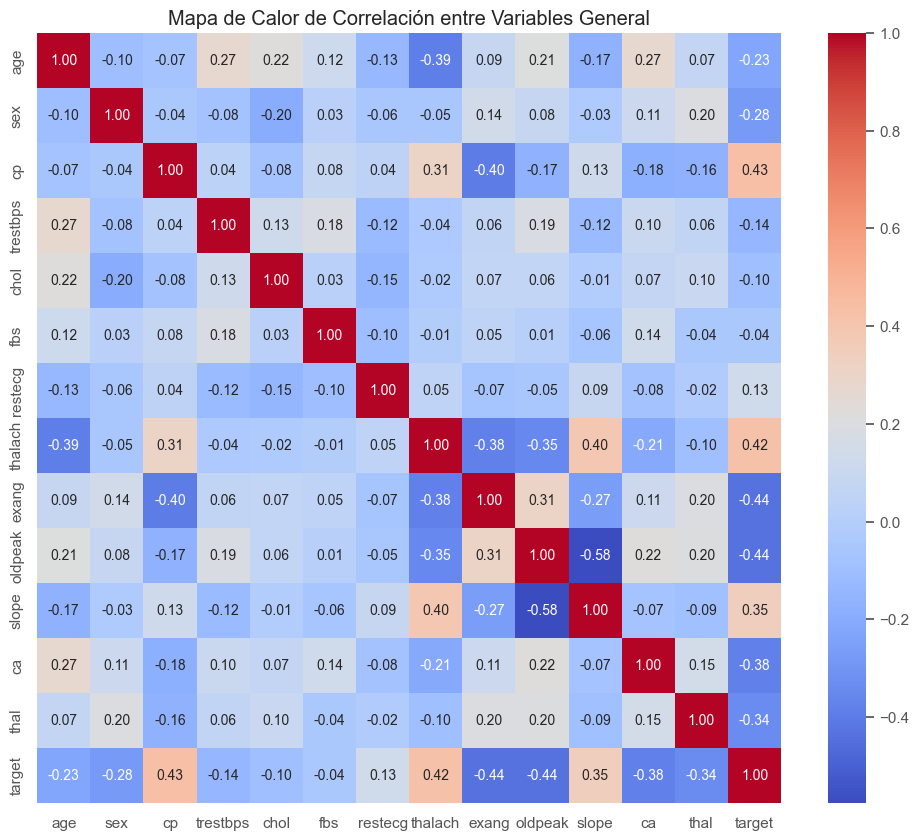

In [72]:
#corr = df[['age','trestbps','chol','thalach','oldpeak','ca','target']].corr()
corr = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables General")
plt.show()

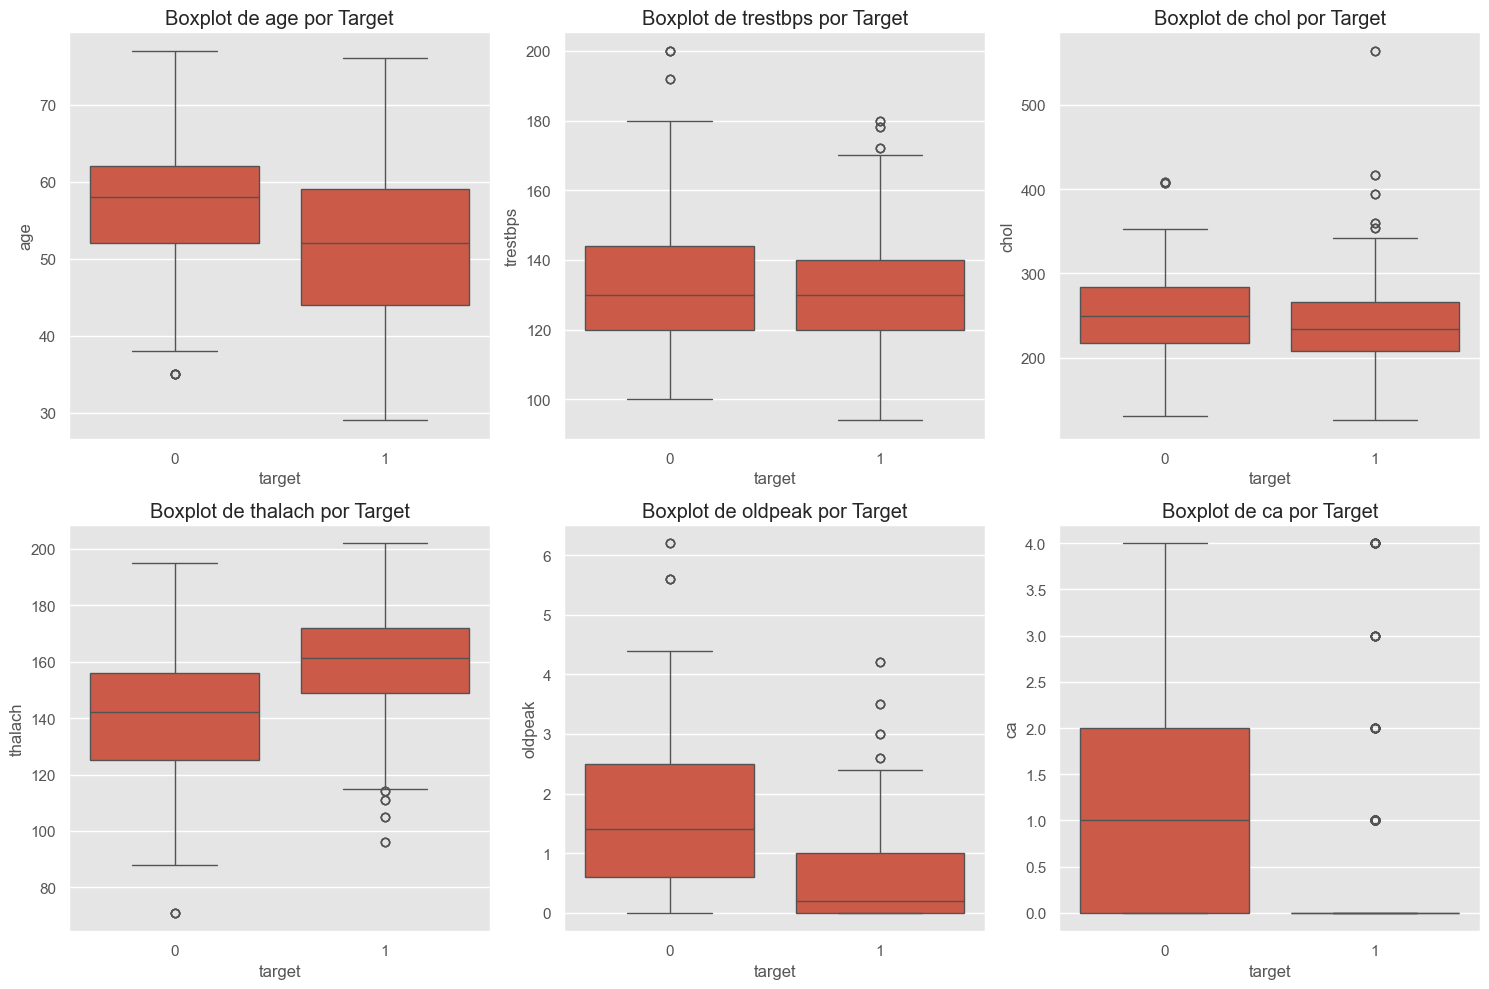

In [73]:
var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(var, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=variable, data=df)
    plt.title(f'Boxplot de {variable} por Target')

plt.tight_layout()
plt.show()

**Resultado**: En este diagrama de cajas (boxplot) podemos visualizar que en la variable age se hay una tendencia de aquellos que son mayores pueden presentar ataques cardiácos. Las variables trestbps y chol no tienen una diferencia entre los dos grupos respecto a la variable target, esto podría indicarnos que no estan muy relacionadas con la variable target. En cuanto a la variable thalach se visualiza que aquellos que tienen más frecuencia cardiáca tienden a sufrir más ataques. Las variables oldpeak y ca muestra un menor riesgo a sufrir ataques.

# **Variables Cualitativas**

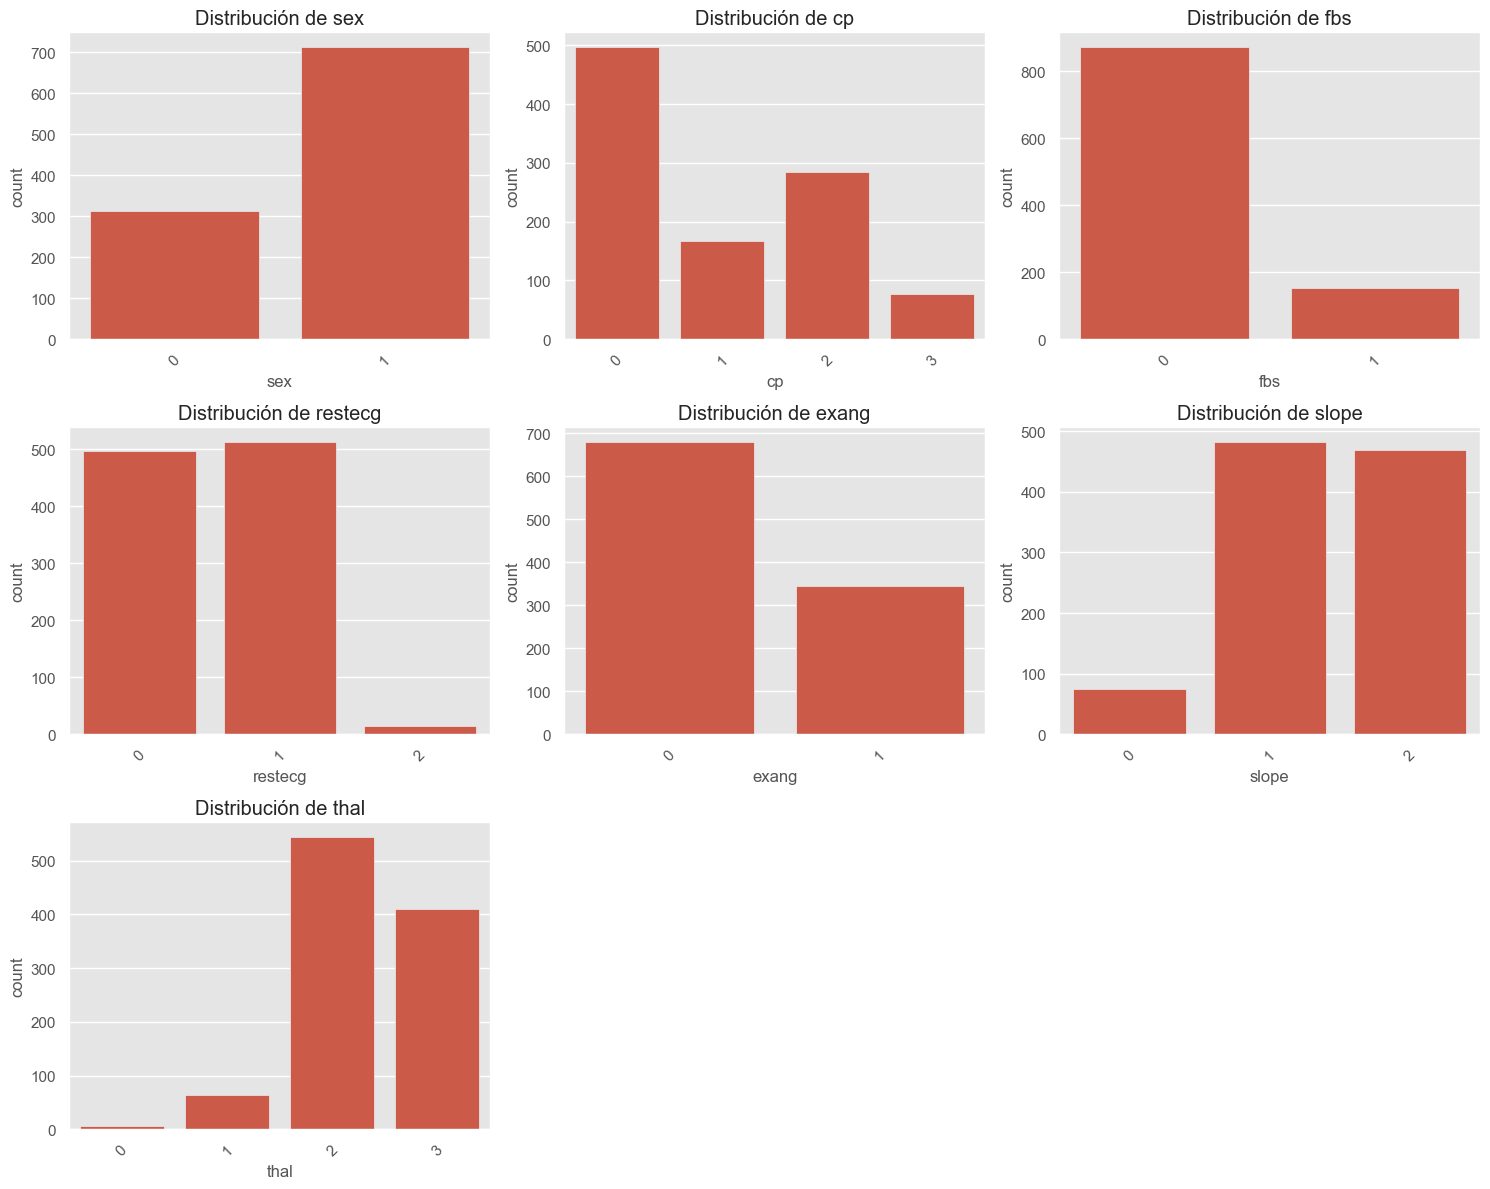

In [74]:
var1 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
plt.figure(figsize=(15, 12))
for i, variable in enumerate(var1, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable)
    plt.title(f'Distribución de {variable}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Resultado**: De los datos podemos que en su mayoría son hombres, en cuanto a la variable cp la angina tipica es el dolor de pecho más común. Para la variable fbs, la mayoría tiene un nivel de azúcar menor a 120. Para la variable restecg indica que tiene una anomalía en su electrocardiograma. Para exang los pacientes no tienen más a tener angina inducida por el ejercicio. Para slope y thal se reparten entre 2 categorías, podría tomarse en cuenta para el modelo.

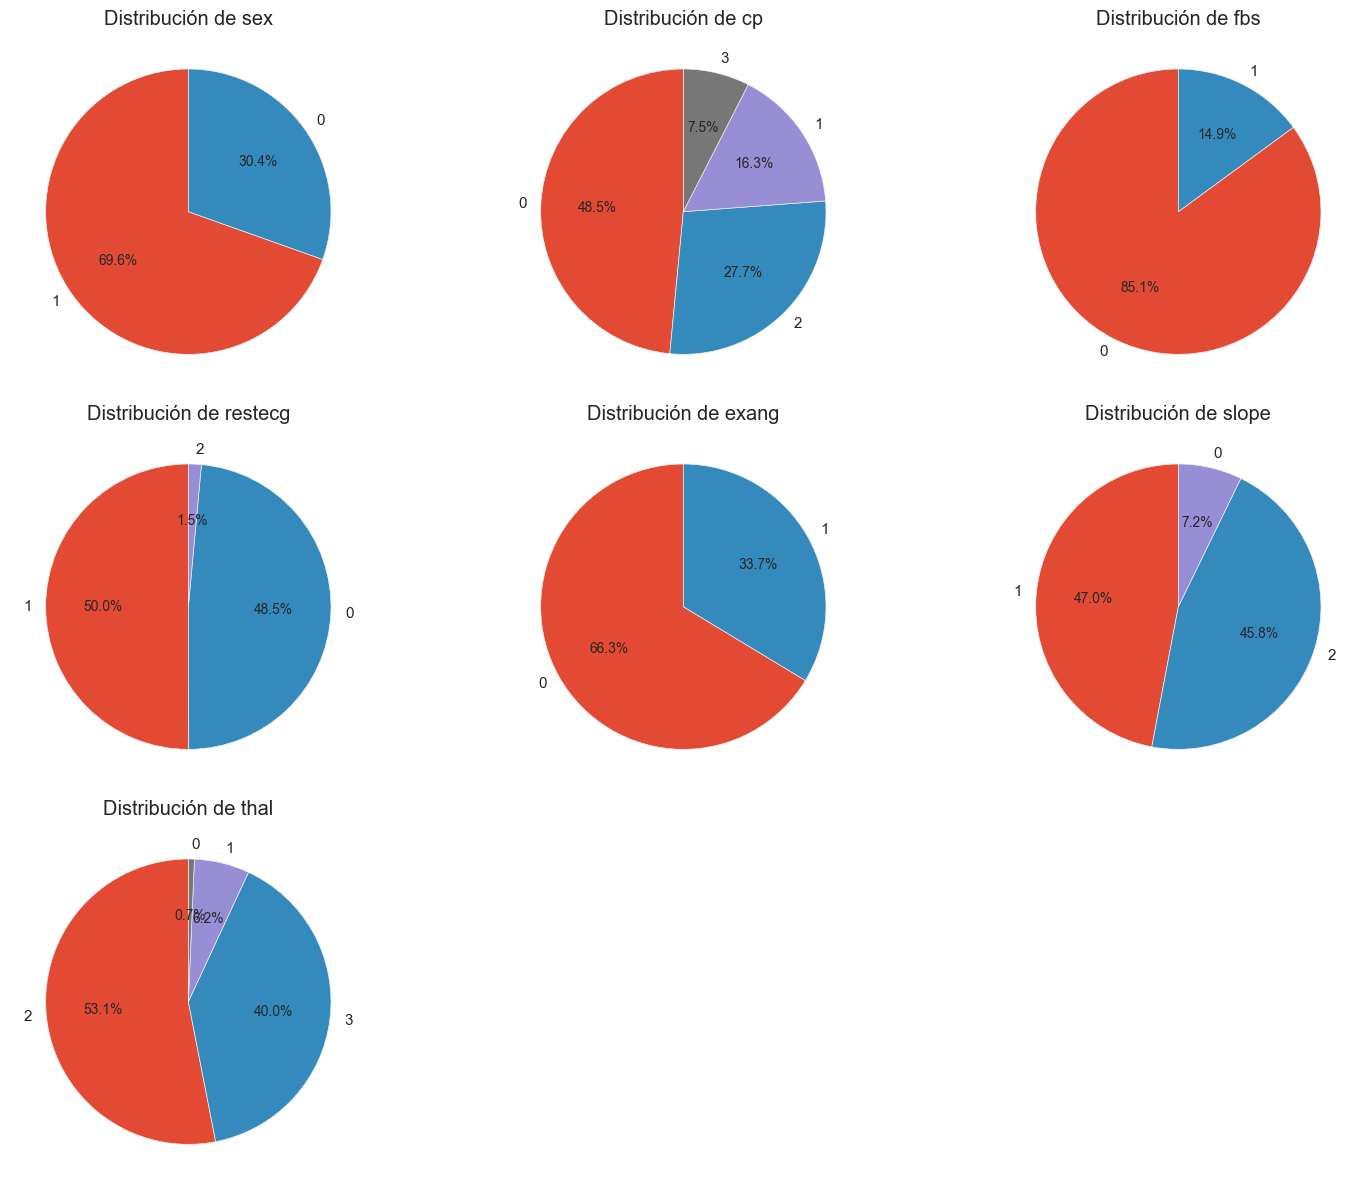

In [75]:
var2= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(var2, 1):
    plt.subplot(3, 3, i)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de {variable}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Resultado**: En esta gráfica se puede visualizar la distribución de los datos de estas variables, nos ayuda a complementar el gráfico anterior.

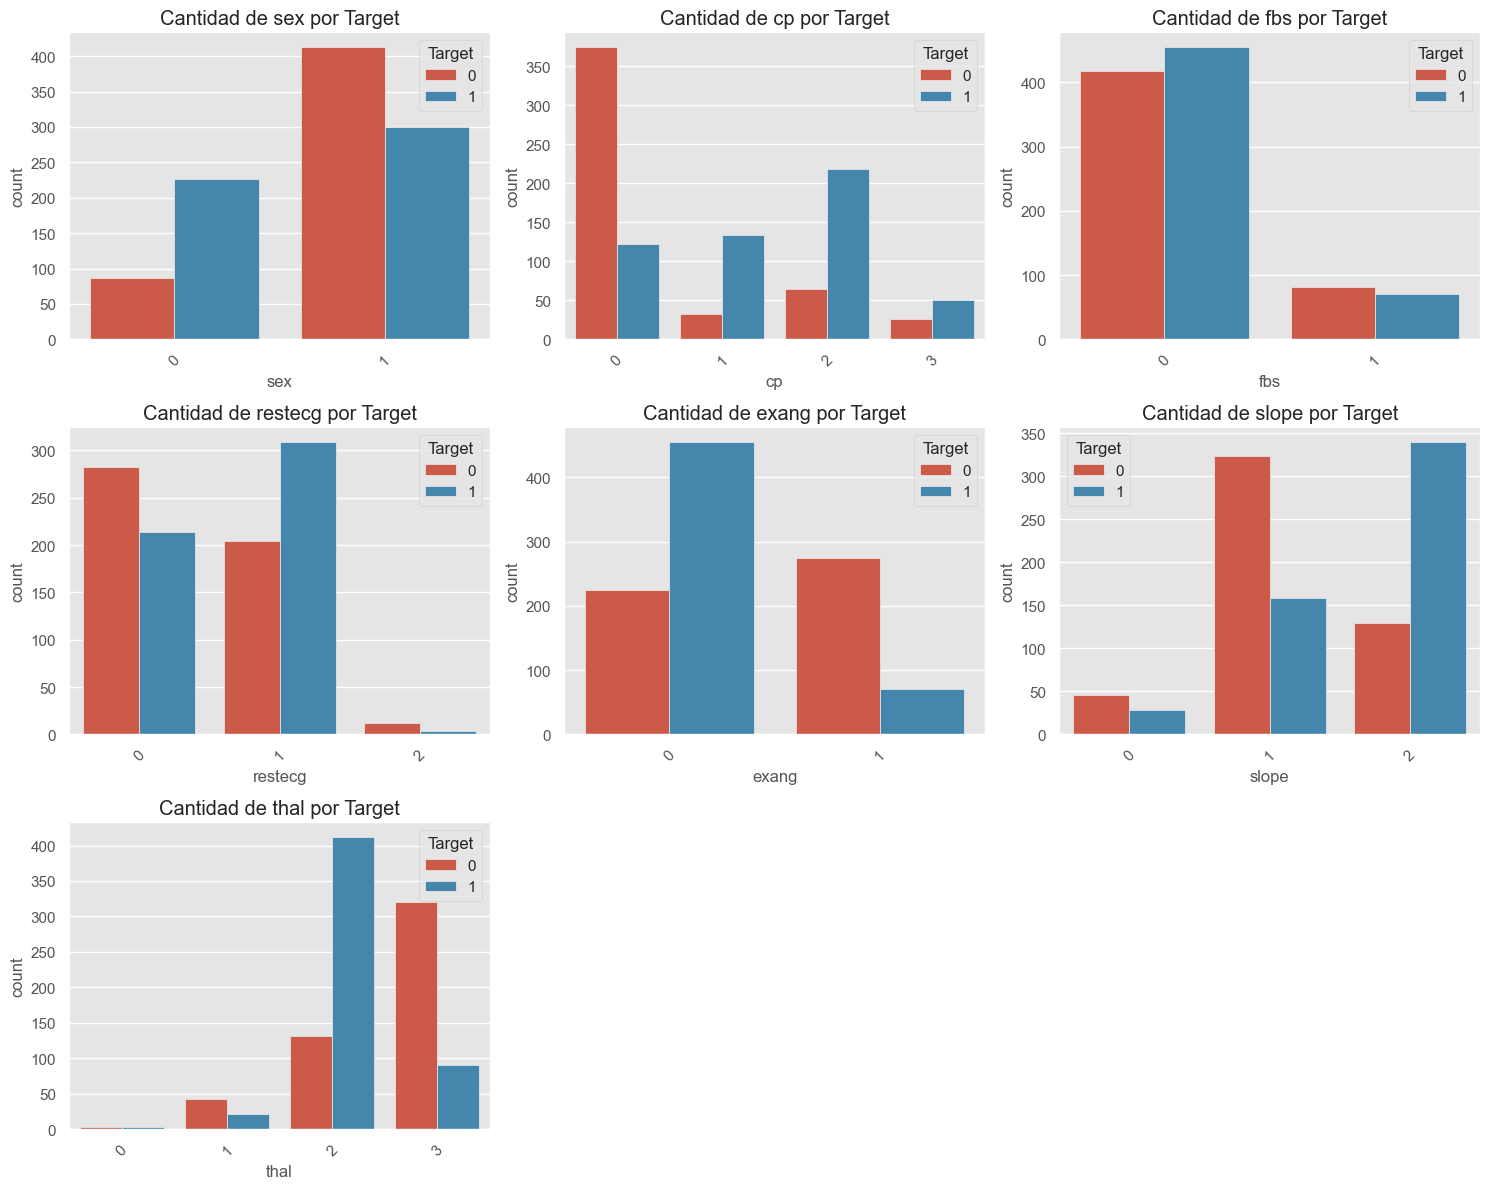

In [76]:
var3 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(var3, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=variable, hue='target')
    plt.title(f'Cantidad de {variable} por Target')
    plt.legend(title='Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Resultado**: Aqui se visualiza como las variables cualitativas varían respecto a la variable target. La variable sex indica que los hombres tienen más riesgo, para cp aquellos que tienen angina tipica y dolor no anginoso tienen más riesgo a padecer un ataque. En exang aquellas no tienen angina anducida por ejercicio tienen más riesgo de padecer un ataque. En la variable slope el valor plano (2) es más propenso a un ataque.

In [77]:
correlacion = df[['sex', 'fbs', 'cp', 'restecg', 'exang', 'slope', 'thal', 'target']].corr()
correlacion_target = correlacion['target'].sort_values(ascending=False)
print(correlacion_target)

target     1.000000
cp         0.434854
slope      0.345512
restecg    0.134468
fbs       -0.041164
sex       -0.279501
thal      -0.337838
exang     -0.438029
Name: target, dtype: float64


**Resultado**: Existe una correlación positiva y significativa con CP. También se visualiza una correlación inversa con la variable exang. Las demás variables no representan una correlación fuerte.

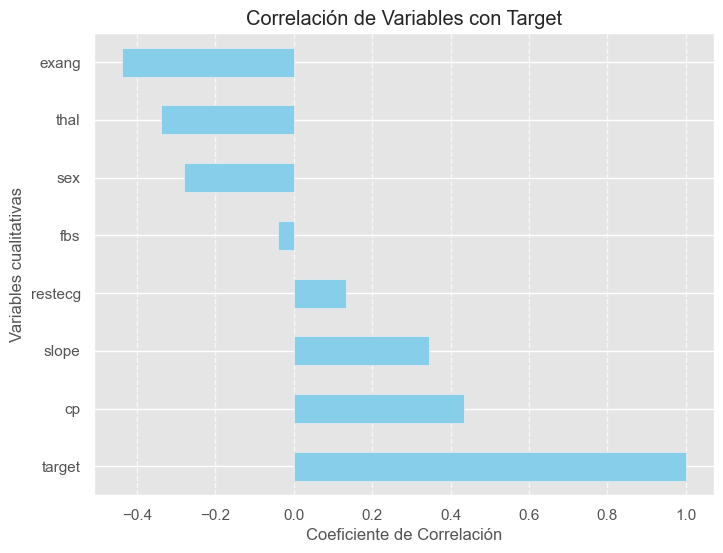

In [78]:
plt.figure(figsize=(8, 6))
correlacion_target.plot(kind='barh', color='skyblue')
plt.title('Correlación de Variables con Target')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables cualitativas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Resultado**: De manera más gráfica podemos ver la correlación que existe entre las variables cualitativas con la variable target.

Para el modelo, las variables con mayor relación con target son:    

Cuantitativas: thalach, oldpeak, ca

Cualitativas: cp, exang

In [79]:

#Prueba1
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar todas las columnas para el análisis
selected_columns = ['age','thalach','oldpeak','ca']
data_selected = df[selected_columns]

#'age','trestbps','chol','thalach','oldpeak','ca'

# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_minmax, columns=selected_columns)

# Aplicar Z-Score Normalization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_selected)
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_columns)

# Mostrar los resultados normalizados (primeras filas)
data_minmax_df.head(), data_standardized_df.head()

(        age   thalach   oldpeak    ca
 0  0.479167  0.740458  0.161290  0.50
 1  0.500000  0.641221  0.500000  0.00
 2  0.854167  0.412214  0.419355  0.00
 3  0.666667  0.687023  0.000000  0.25
 4  0.687500  0.267176  0.306452  0.75,
         age   thalach   oldpeak        ca
 0 -0.268437  0.821321 -0.060888  1.209221
 1 -0.158157  0.255968  1.727137 -0.731971
 2  1.716595 -1.048692  1.301417 -0.731971
 3  0.724079  0.516900 -0.912329  0.238625
 4  0.834359 -1.874977  0.705408  2.179817)

In [80]:
#prueba 2

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar todas las columnas para el análisis
selected_columns = ['age','trestbps','chol','thalach','oldpeak','ca']
data_selected = df[selected_columns]

#'age','trestbps','chol','thalach','oldpeak','ca'

# Aplicar Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_selected)
data_minmax_df = pd.DataFrame(data_minmax, columns=selected_columns)

# Aplicar Z-Score Normalization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_selected)
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_columns)

# Mostrar los resultados normalizados (primeras filas)
data_minmax_df.head(), data_standardized_df.head()

(        age  trestbps      chol   thalach   oldpeak    ca
 0  0.479167  0.292453  0.196347  0.740458  0.161290  0.50
 1  0.500000  0.433962  0.175799  0.641221  0.500000  0.00
 2  0.854167  0.481132  0.109589  0.412214  0.419355  0.00
 3  0.666667  0.509434  0.175799  0.687023  0.000000  0.25
 4  0.687500  0.415094  0.383562  0.267176  0.306452  0.75,
         age  trestbps      chol   thalach   oldpeak        ca
 0 -0.268437 -0.377636 -0.659332  0.821321 -0.060888  1.209221
 1 -0.158157  0.479107 -0.833861  0.255968  1.727137 -0.731971
 2  1.716595  0.764688 -1.396233 -1.048692  1.301417 -0.731971
 3  0.724079  0.936037 -0.833861  0.516900 -0.912329  0.238625
 4  0.834359  0.364875  0.930822 -1.874977  0.705408  2.179817)

de aqui empieza su codigo

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       102
           1       0.75      0.78      0.77       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



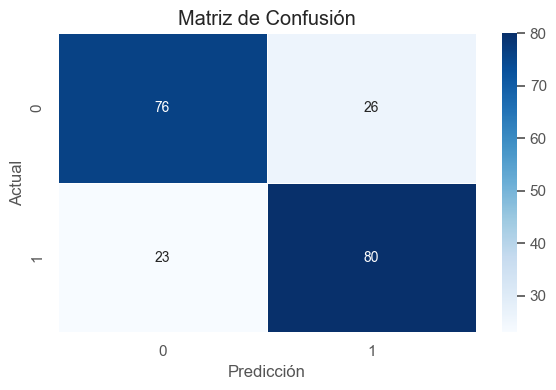

In [81]:
#Prueba 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras (features) y variable objetivo (target)
# Asegúrate de que 'variables_seleccionadas' contiene las columnas correctas
variables_seleccionadas = ['age','trestbps','chol','thalach','oldpeak','ca']  # Seleccionadas por su correlación con 'target'
X = df[variables_seleccionadas]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200, random_state=52)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.tight_layout()


plt.show()



Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       100
           1       0.79      0.89      0.83       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



C:\Users\Usuario\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


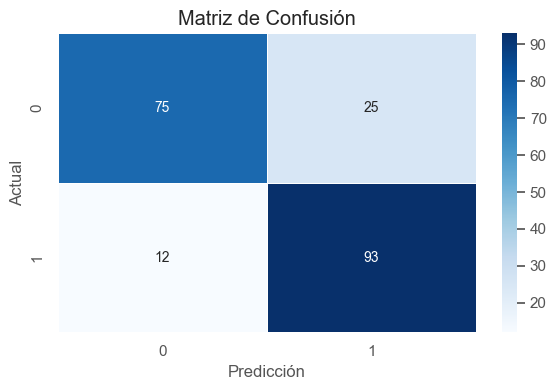

In [82]:
#Prueba 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables predictoras (features) y variable objetivo (target)
# Asegúrate de que 'variables_seleccionadas' contiene las columnas correctas
variables_seleccionadas = ['age','trestbps','chol','thalach','oldpeak','ca','sex', 'fbs', 'cp', 'restecg', 'exang', 'slope', 'thal']  # Seleccionadas por su correlación con 'target'
X = df[variables_seleccionadas]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200, random_state=62)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

#random state que es

In [83]:
from sklearn.model_selection import train_test_split

# Seleccionar solo las variables seleccionadas para el modelo
variables_seleccionadas = ['thalach', 'oldpeak', 'ca','cp','exang']  # Asegúrate de que esta lista tiene las columnas correctas
X = df[variables_seleccionadas]  # Variables predictoras seleccionadas
y = df['target']  # Variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

# Verificar tamaños de los conjuntos
print(f'Tamaño de entrenamiento: {X_train.shape}')
print(f'Tamaño de prueba: {X_test.shape}')


Tamaño de entrenamiento: (820, 5)
Tamaño de prueba: (205, 5)


Accuracy Score: 0.79
Recall Score: 0.87
Precision Score: 0.74


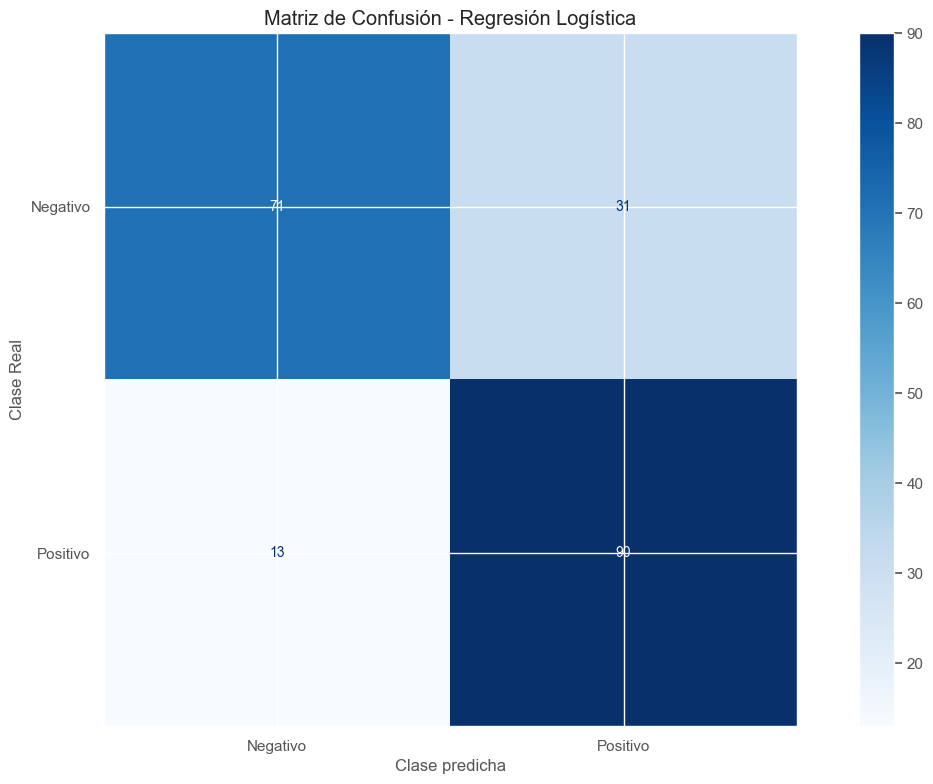

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.2f}')
print(f'Recall Score: {recall_score(y_test, y_pred):.2f}')
print(f'Precision Score: {precision_score(y_test, y_pred):.2f}')

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Negativo", "Positivo"], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel("Clase Real")
plt.xlabel("Clase predicha")
plt.show()

Accuracy Score (SVC): 0.66
Recall Score (SVC): 0.72
Precision Score (SVC): 0.65


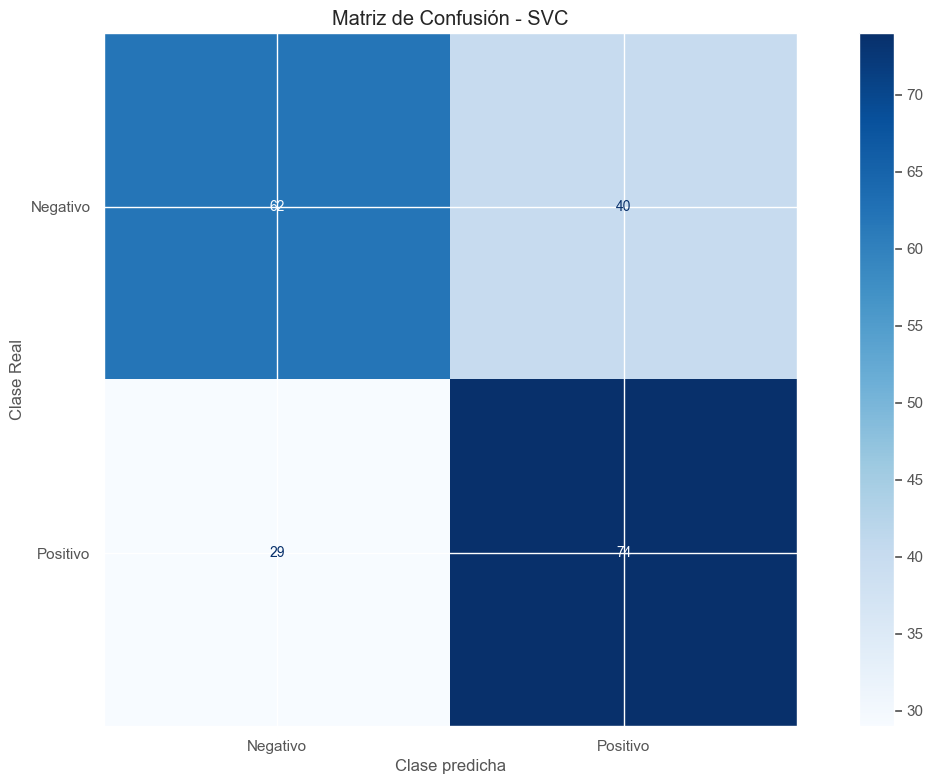

In [85]:
from sklearn.svm import SVC

# Crear y ajustar el modelo SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)

# Predicciones con SVC
y_pred_svc = model_svc.predict(X_test)

# Evaluación del modelo SVC
print(f'Accuracy Score (SVC): {accuracy_score(y_test, y_pred_svc):.2f}')
print(f'Recall Score (SVC): {recall_score(y_test, y_pred_svc):.2f}')
print(f'Precision Score (SVC): {precision_score(y_test, y_pred_svc):.2f}')

# Matriz de confusión para SVC

ConfusionMatrixDisplay.from_estimator(model_svc, X_test, y_test, display_labels=["Negativo", "Positivo"], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - SVC')
plt.ylabel("Clase Real")
plt.xlabel("Clase predicha")
plt.show()


# **Árbol de desición**

In [86]:
# Solicitamos una copia del data frame
df.copy()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

- Se muestra el número de registros y columnas del archivo.

- Luego pasamos a entrenar y predecir los resultados en base a algoritmo de árbol de decisiones y conseguimos el reporte.

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print('Reporte de Clasificación: \n', classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



- Volvemos a ejecutar una gráfica de regresión para observar los cambios de precisión de la predicción en base al algoritmo de árbol de decisiones.

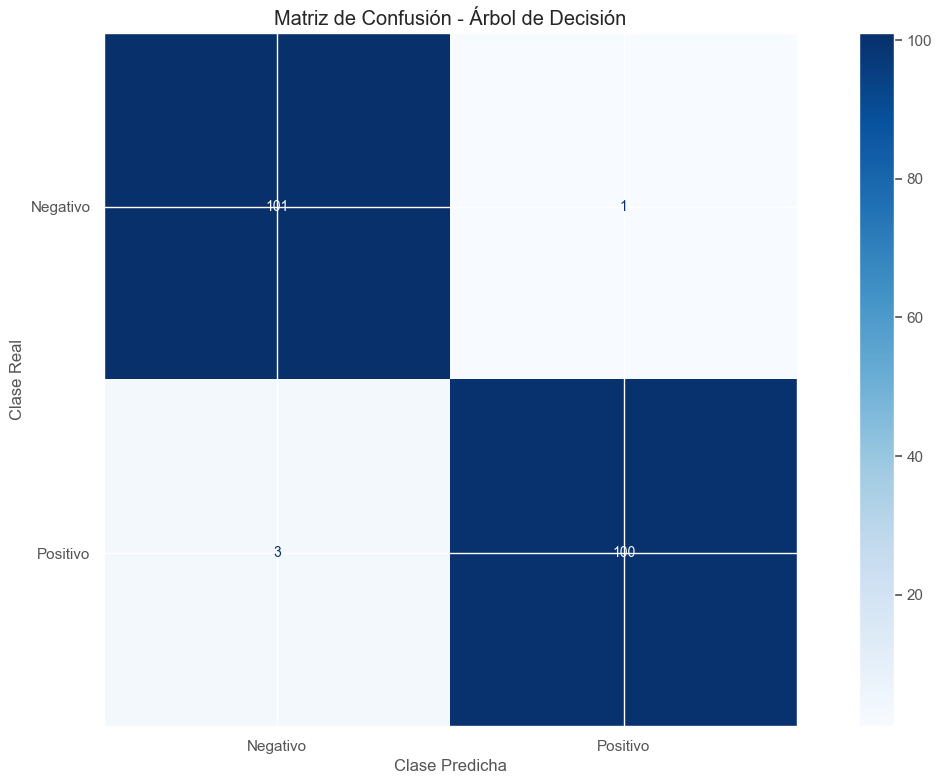

In [88]:
# Gráfica de la matriz de confusión
# Matriz de confusión para Árbol de decisiones
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test, display_labels=["Negativo", "Positivo"], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")

plt.show()


**Resultado:** Observamos que la predicción tuvo un mayor acierto en los caso de `Riesgo positivo`, llegando casi al 100%

## **Revisamos la importancias de las variables**

In [89]:
# Muestra la importancia que le da a cada variable de la lista
tree_clf.feature_importances_

array([0.26103607, 0.21011279, 0.17298356, 0.29364388, 0.06222369])

In [90]:
# Muestra el orden de las columnas en base a la importancia que se le dio en la parte anterior
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [91]:
# Convierte el dataframe para una mejor visualización
import pandas as pd

df_importances = pd.DataFrame({
    'Variables': X.columns,
    'Importancia DTC': tree_clf.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

Variables  Importancia DTC
3        cp         0.293644
0   thalach         0.261036
1   oldpeak         0.210113
2        ca         0.172984
4     exang         0.062224

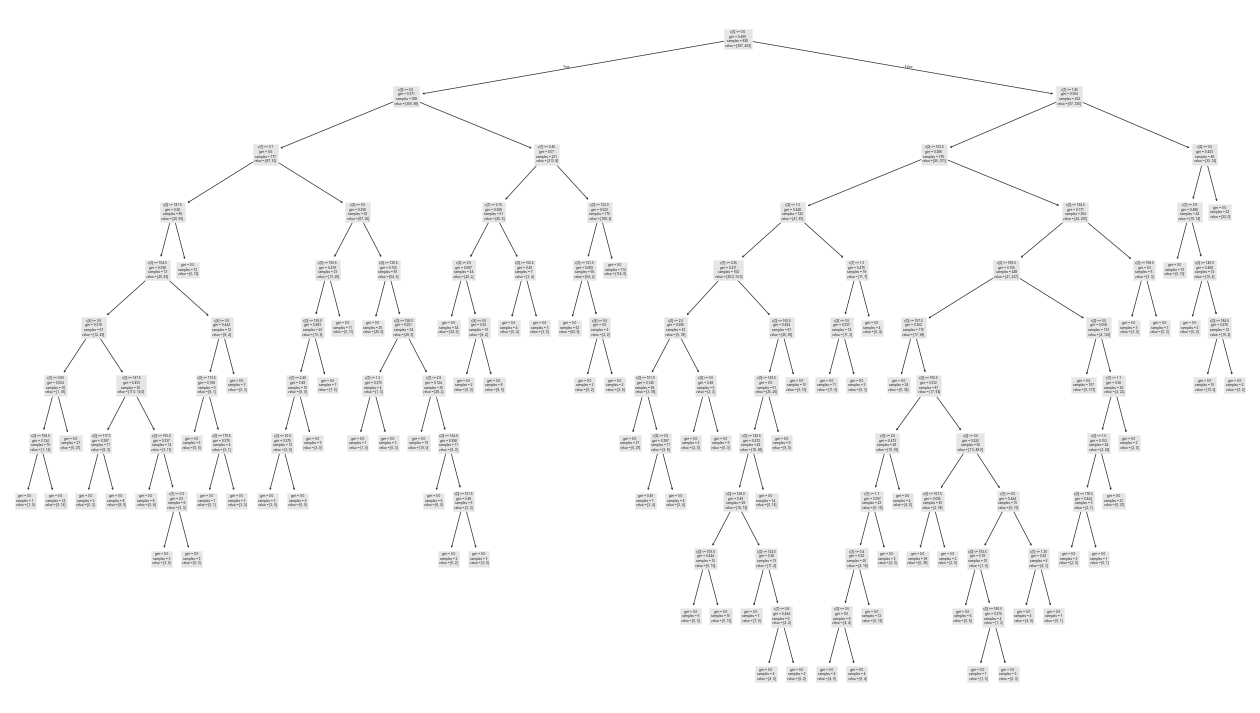

In [92]:
from sklearn import tree
_ = tree.plot_tree(tree_clf)

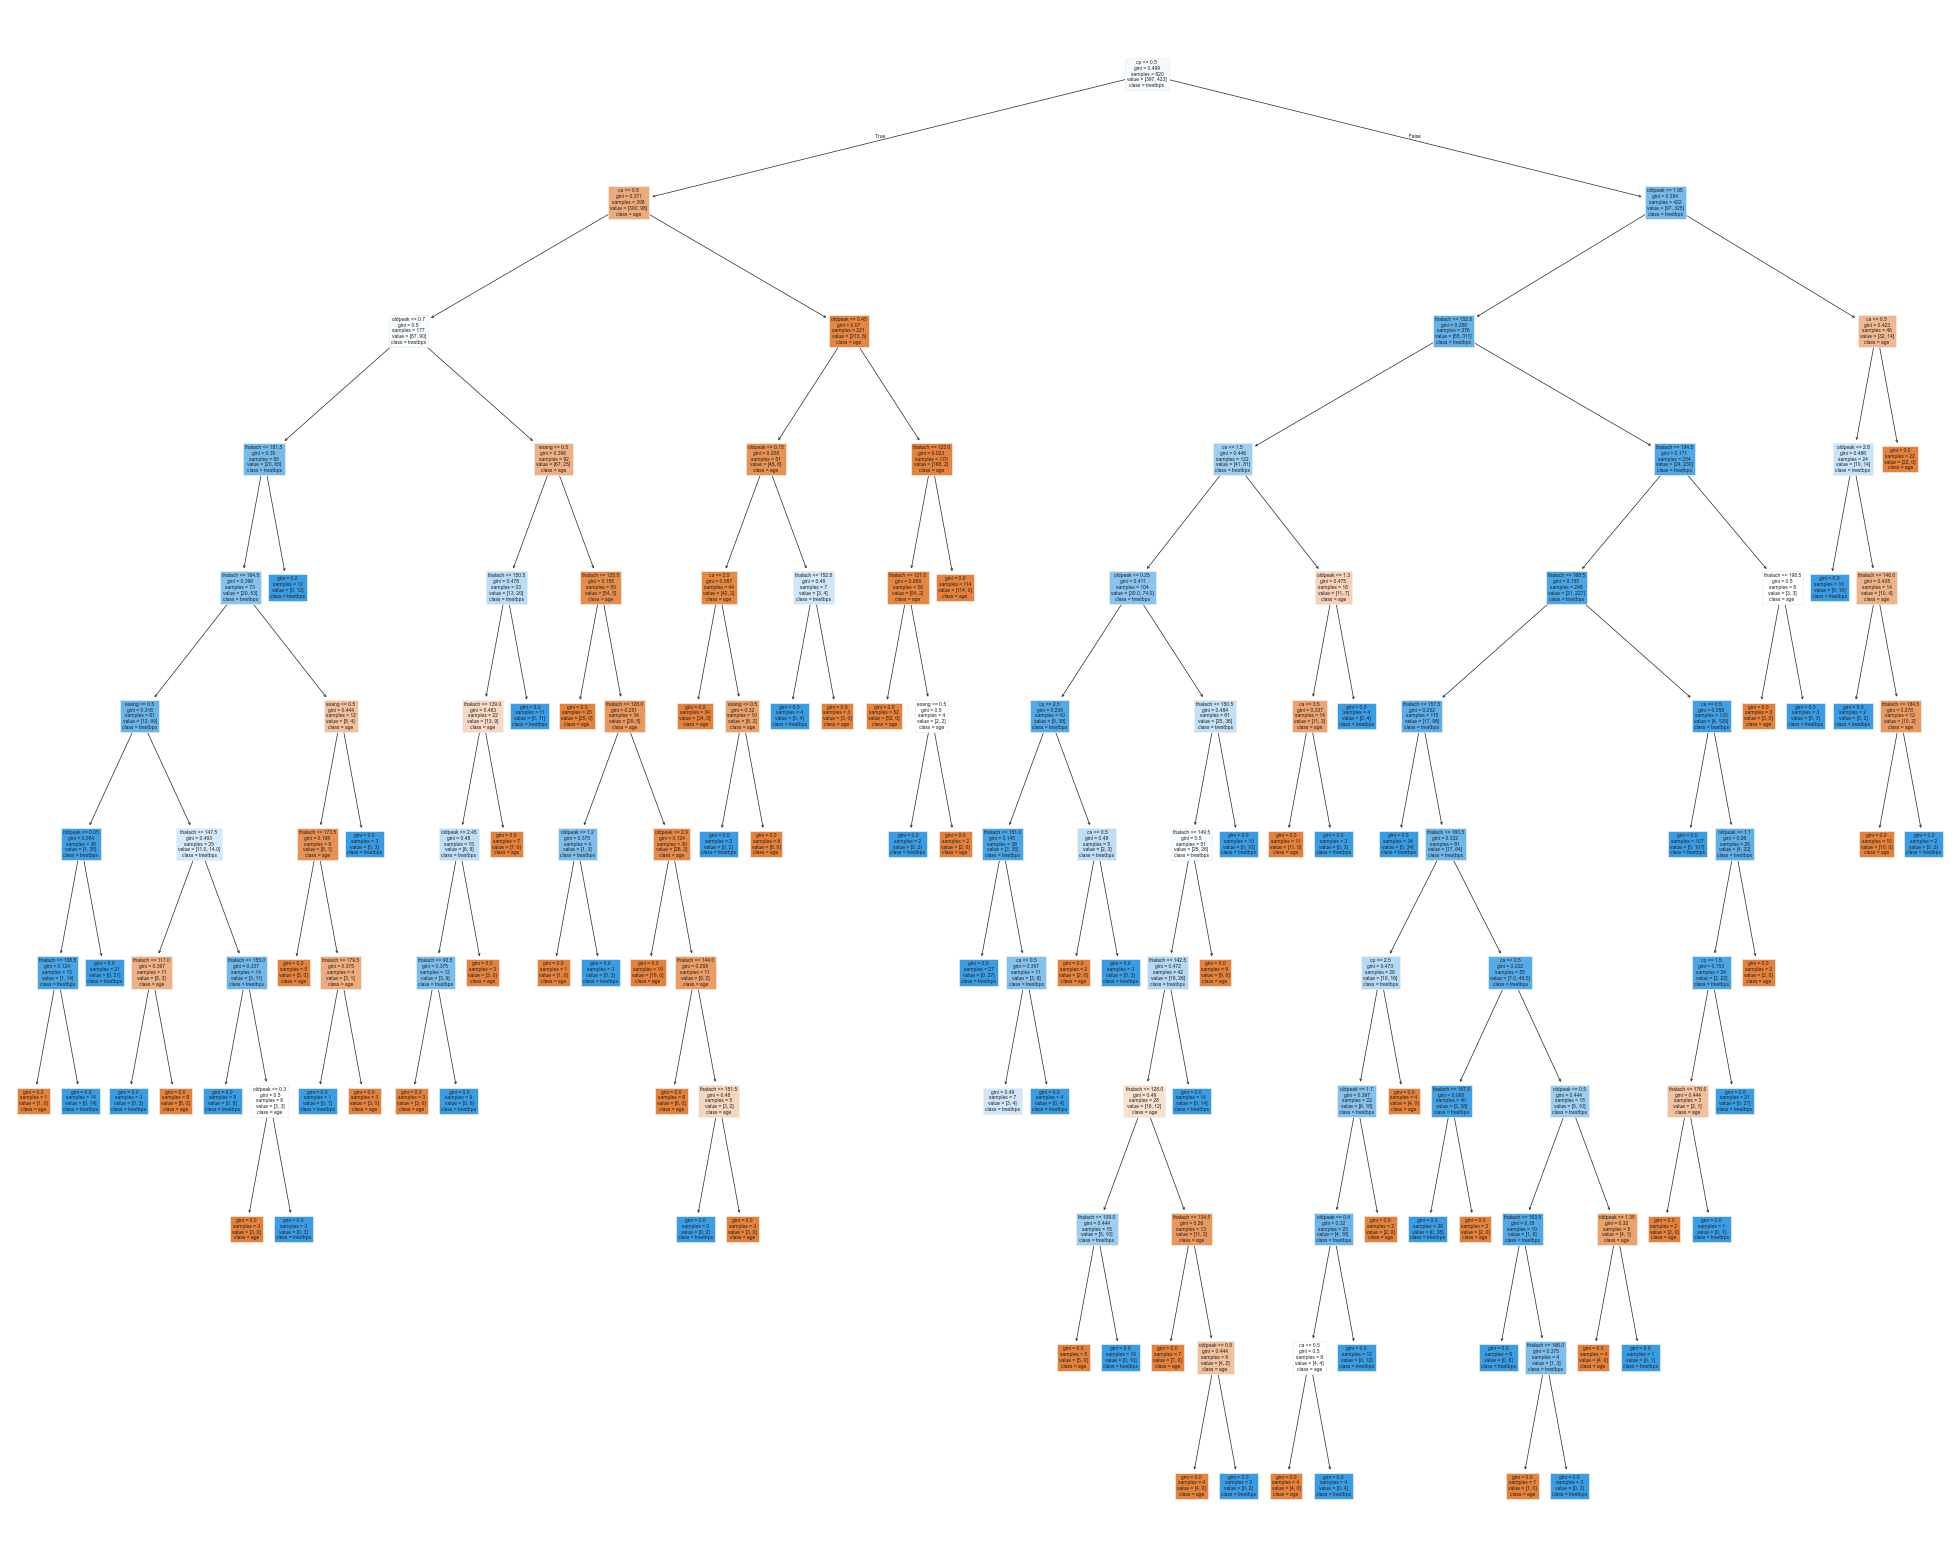

In [93]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, feature_names=X.columns, 
                class_names=selected_columns, 
                filled=True)

# Guarda la imagen del árbol
fig.savefig("decision_tree.png")

## **Resultado sin variables poco importantes para árbol**

In [94]:
#df = pd.read_csv('heartAttack.csv', sep=",", encoding='latin1')
#df = data_selected()
dataset_opt = df.copy()

In [95]:
dataset_opt.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'slope'], axis=1, inplace=True)

In [96]:
x = np.asarray(dataset_opt)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1)

In [98]:
X_train.shape

(820, 7)

## **Entrenamiento en árbol de decisiones con variable importantes**

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print('Reporte de Clasificación: \n', classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



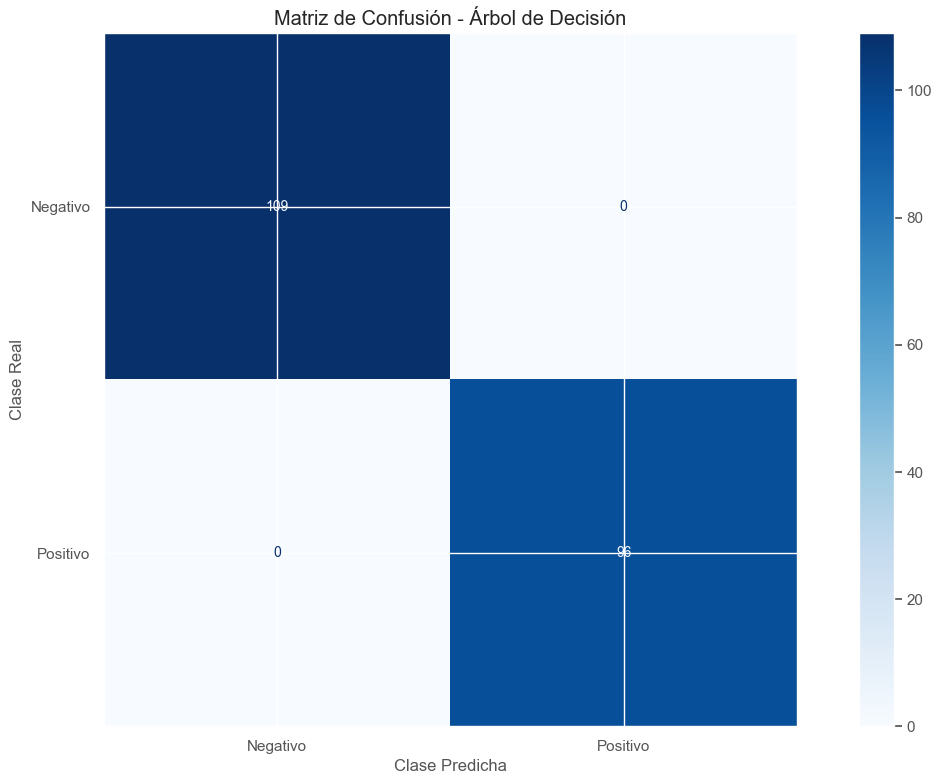

In [100]:
# Gráfica de la matriz de confusión
# Matriz de confusión para Árbol de decisiones
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test, display_labels=["Negativo", "Positivo"], cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")

plt.show()

In [101]:
tree_clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 1.])

In [102]:
df.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thal', 'restecg', 'slope', 'target'], axis=1, inplace=True)

In [103]:
# Muestra el orden de las columnas en base a la importancia que se le dio en la parte anterior
df.columns

Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

In [104]:
df_importances.sort_values(by='Importancia DTC', ascending=False)

Variables  Importancia DTC
3        cp         0.293644
0   thalach         0.261036
1   oldpeak         0.210113
2        ca         0.172984
4     exang         0.062224

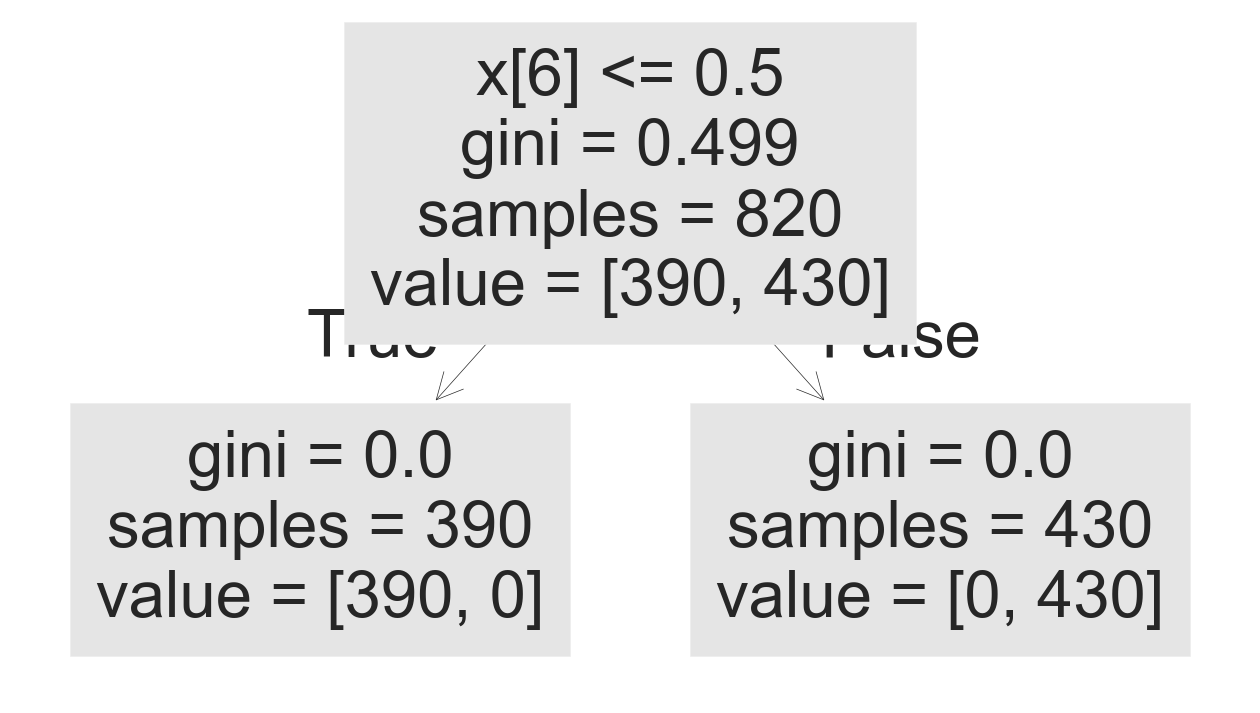

In [112]:
from sklearn import tree
_ = tree.plot_tree(tree_clf)

In [ ]:
fig = plt.figure(figsize=(25,20))

# Guarda la imagen del árbol
fig.savefig("decision_tree_mod.png")



C:\Users\Usuario\AppData\Local\Temp\ipykernel_23768\388013945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 2500x2000 with 0 Axes>